In [1]:
from glob import glob
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

#Supress Warnings
import warnings
warnings.filterwarnings("ignore")


In [17]:
def profit(files,cash):
    cash_flow = np.zeros((len(files)+1))
    cash_flow[0] = cash

    for c,f in enumerate(files):
        d = pd.read_csv(f)

        #Pick random stock in the list of output
        idx = np.random.randint(len(d))
        pct = (d['highest_pct'].values[idx]/100) * 5
        
        cash_flow[c+1] = cash_flow[c] + (cash_flow[c]*pct)

    return cash_flow

In [18]:
#Set some parameters
cash = 500

#Bootstrap
n = 1000

files = sorted(glob('output/psa_2021*'))
cash_flow_bs = np.array([profit(files,cash) for N in tqdm(range(n))])



100%|███████████████████████████████████████| 1000/1000 [09:02<00:00,  1.84it/s]


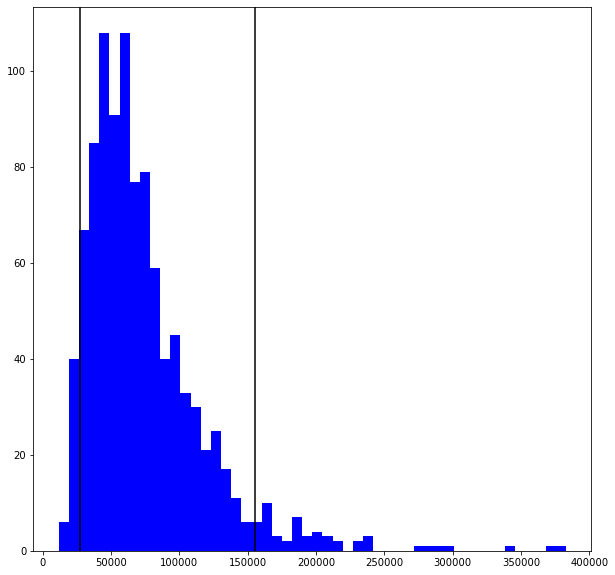

5th percentile: $27316.94
50th percentile: $63204.44
95th percentile: $155205.15


In [5]:
#plot a histogram -> buying shares only
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)

#Plot the ending cash for 2021 so far
plt.hist(cash_flow_bs[:,-1],bins=50,color='blue')
p05,p95 = np.nanpercentile(cash_flow_bs[:,-1],[5,95])

plt.axvline(x=p05,color='k')
plt.axvline(x=p95,color='k')

plt.show()
plt.close()

print('5th percentile: ${:.2f}'.format(p05))
print('50th percentile: ${:.2f}'.format(np.nanmedian(cash_flow_bs[:,-1])))
print('95th percentile: ${:.2f}'.format(p95))



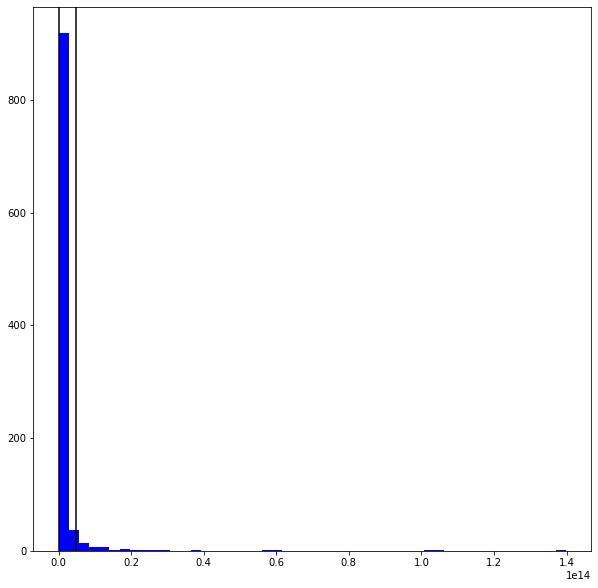

5th percentile: $3351955360.18
50th percentile: $132166693928.38
95th percentile: $4652909226003.33


In [20]:
#plot a histogram -> options parameterization
plt.figure(figsize=(10,10))
ax = plt.subplot(1,1,1)

#Plot the ending cash for 2021 so far
plt.hist(cash_flow_bs[:,-1],bins=50,color='blue')
p05,p95 = np.nanpercentile(cash_flow_bs[:,-1],[5,95])

plt.axvline(x=p05,color='k')
plt.axvline(x=p95,color='k')

plt.show()
plt.close()

print('5th percentile: ${:.2f}'.format(p05))
print('50th percentile: ${:.2f}'.format(np.nanmedian(cash_flow_bs[:,-1])))
print('95th percentile: ${:.2f}'.format(p95))



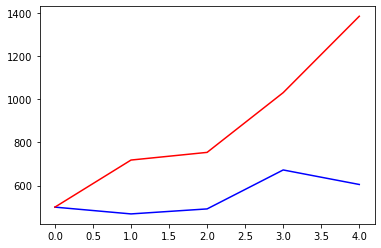

In [24]:
p05 = np.percentile(cash_flow_bs[:,:5],1,axis=0)
p95 = np.percentile(cash_flow_bs[:,:5],99,axis=0)

plt.plot(p05,color='blue')
plt.plot(p95,color='red')


plt.show()
plt.close()